##### Link Colab https://colab.research.google.com/drive/1N68qI3_r8U7_KCvYqcj7ZPHkWhao78rM?usp=sharing

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [14]:
data = pd.read_excel('Churn Dataset N_10000.xlsx', sheet_name='sample')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_id           10000 non-null  datetime64[ns]
 1   subs_no           10000 non-null  int64         
 2   brand             10000 non-null  int64         
 3   status            10000 non-null  object        
 4   tenure            10000 non-null  int64         
 5   dsle              10000 non-null  int64         
 6   dwe_m0            8194 non-null   float64       
 7   dwg_m0            8194 non-null   float64       
 8   dsle_grp          8194 non-null   object        
 9   dwe_m0_grp        8194 non-null   float64       
 10  dwg_m0_grp        8194 non-null   float64       
 11  non_data          10000 non-null  int64         
 12  rembal            10000 non-null  int64         
 13  svc_user          10000 non-null  object        
 14  rem_quota_data    10000

### EDA

In [15]:
data_sample=data.copy()

C:\Users\User\AppData\Local\Temp\ipykernel_11060\1998178868.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_churn", data=data, palette="coolwarm")


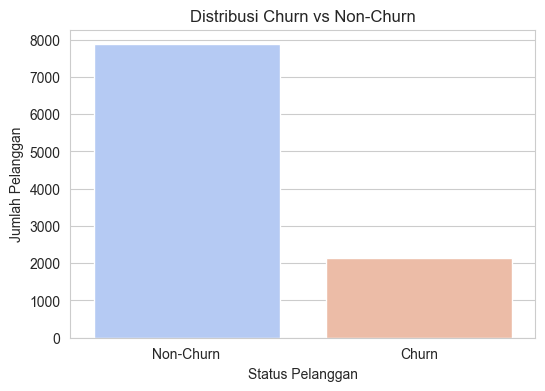

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

data["date_id"] = pd.to_datetime(data["date_id"])

data["is_churn"] = data["label_dsle"]

sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x="is_churn", data=data, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Non-Churn", "Churn"])
plt.xlabel("Status Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Churn vs Non-Churn")
plt.show()

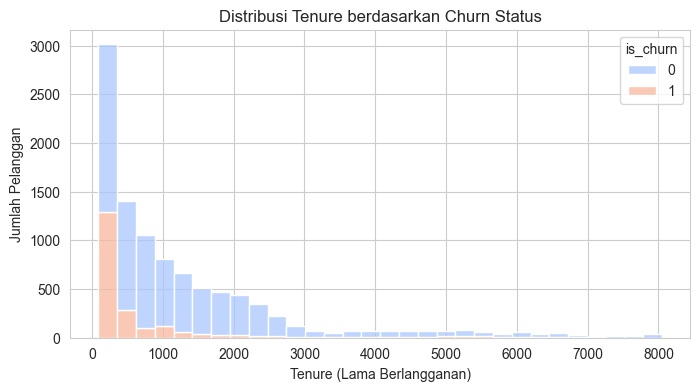

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(data, x="tenure", hue="is_churn", multiple="stack", bins=30, palette="coolwarm")
plt.xlabel("Tenure (Lama Berlangganan)")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Tenure berdasarkan Churn Status")
plt.show()

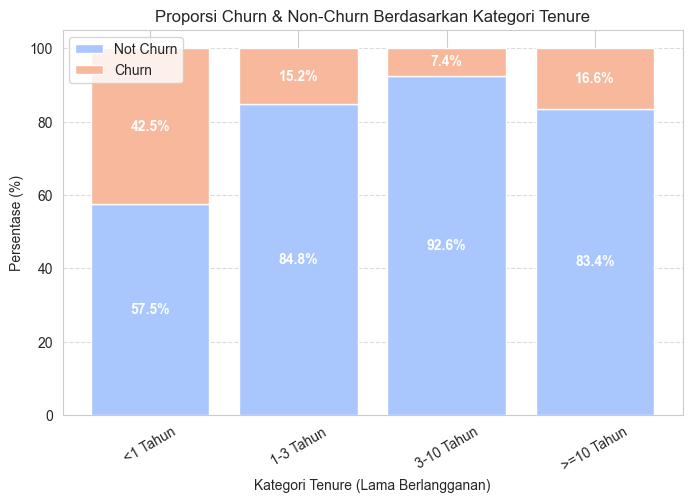

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def categorize_tenure(tenure):
    if tenure < 365:  
        return "<1 Tahun"
    elif 365 <= tenure < 1095:  
        return "1-3 Tahun"
    elif 1095 <= tenure < 3650:  
        return "3-10 Tahun"
    else:  
        return ">=10 Tahun"

data_sample["tenure_category"] = data_sample["tenure"].apply(categorize_tenure)

category_order = ["<1 Tahun", "1-3 Tahun", "3-10 Tahun", ">=10 Tahun"]
data_sample["tenure_category"] = pd.Categorical(data_sample["tenure_category"], categories=category_order, ordered=True)

crosstab_tenure = pd.crosstab(data_sample["tenure_category"], data_sample["label_dsle"])
crosstab_tenure.columns = ["Not Churn", "Churn"]
crosstab_tenure["Total"] = crosstab_tenure["Not Churn"] + crosstab_tenure["Churn"]
crosstab_tenure["Churn Percentage"] = (crosstab_tenure["Churn"] / crosstab_tenure["Total"]) * 100
crosstab_tenure["Not Churn Percentage"] = (crosstab_tenure["Not Churn"] / crosstab_tenure["Total"]) * 100

colors = sns.color_palette("coolwarm", 2)

fig, ax = plt.subplots(figsize=(8, 5))
bar1 = ax.bar(crosstab_tenure.index, crosstab_tenure["Not Churn Percentage"], color=colors[0], label="Not Churn")
bar2 = ax.bar(crosstab_tenure.index, crosstab_tenure["Churn Percentage"], bottom=crosstab_tenure["Not Churn Percentage"], color=colors[1], label="Churn")

for bar, churn, not_churn in zip(bar2, crosstab_tenure["Churn Percentage"], crosstab_tenure["Not Churn Percentage"]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f"{churn:.1f}%", ha="center", va="center", color="white", fontsize=10, fontweight="bold")

for bar, churn, not_churn in zip(bar1, crosstab_tenure["Churn Percentage"], crosstab_tenure["Not Churn Percentage"]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f"{not_churn:.1f}%", ha="center", va="center", color="white", fontsize=10, fontweight="bold")

ax.set_xlabel("Kategori Tenure (Lama Berlangganan)")
ax.set_ylabel("Persentase (%)")
ax.set_title("Proporsi Churn & Non-Churn Berdasarkan Kategori Tenure")
ax.set_xticks(range(len(crosstab_tenure.index)))
ax.set_xticklabels(crosstab_tenure.index, rotation=30)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()




In [20]:
category_counts = data_sample["tenure_category"].value_counts().reindex(["<1 Tahun", "1-3 Tahun", "3-10 Tahun", ">=10 Tahun"])

print("Jumlah Orang di Setiap Kategori Tenure:")
print(category_counts)


Jumlah Orang di Setiap Kategori Tenure:
tenure_category
<1 Tahun      3075
1-3 Tahun     3029
3-10 Tahun    3099
>=10 Tahun     797
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_11060\870732056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_churn", y="data_100kb_30d", data=data, palette="coolwarm")


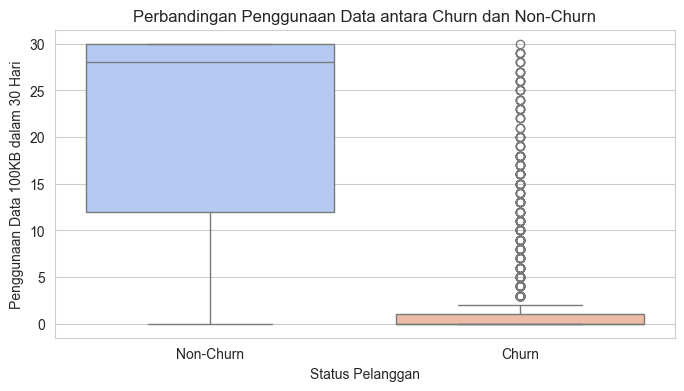

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="is_churn", y="data_100kb_30d", data=data, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Non-Churn", "Churn"])
plt.xlabel("Status Pelanggan")
plt.ylabel("Penggunaan Data 100KB dalam 30 Hari")
plt.title("Perbandingan Penggunaan Data antara Churn dan Non-Churn")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11060\301589301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_churn", y="eod_balance", data=data, palette="coolwarm")


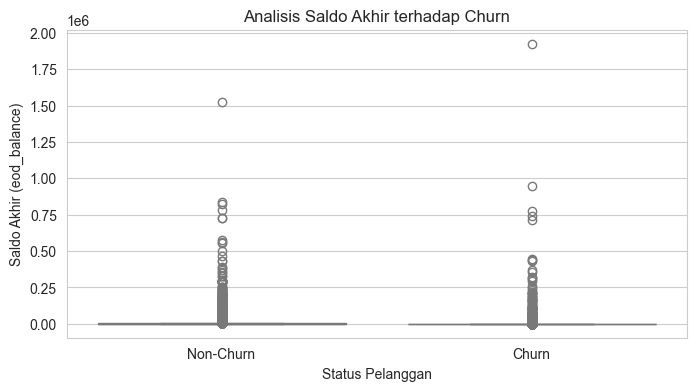

In [22]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="is_churn", y="eod_balance", data=data, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Non-Churn", "Churn"])
plt.xlabel("Status Pelanggan")
plt.ylabel("Saldo Akhir (eod_balance)")
plt.title("Analisis Saldo Akhir terhadap Churn")
plt.show()

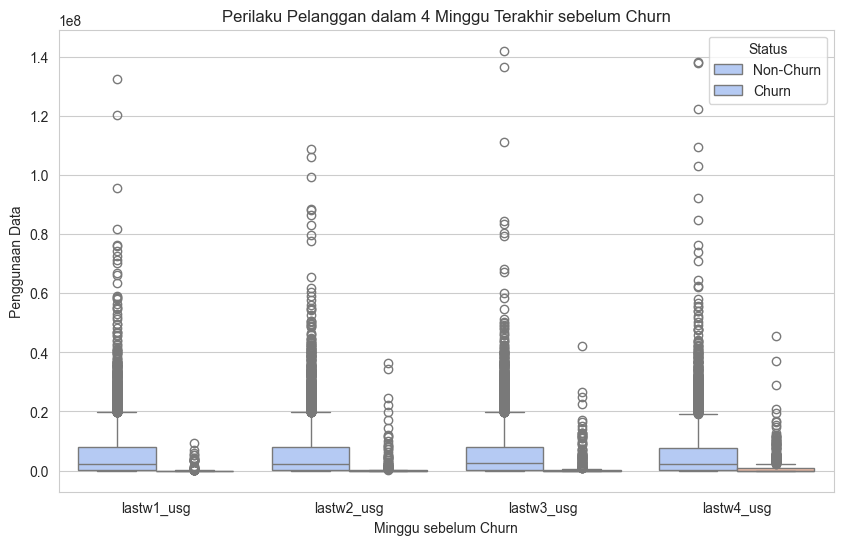

In [23]:
plt.figure(figsize=(10, 6))
data_melted = data.melt(id_vars=["is_churn"], value_vars=["lastw1_usg", "lastw2_usg", "lastw3_usg", "lastw4_usg"], 
                        var_name="Week", value_name="Usage")
sns.boxplot(x="Week", y="Usage", hue="is_churn", data=data_melted, palette="coolwarm")
plt.xlabel("Minggu sebelum Churn")
plt.ylabel("Penggunaan Data")
plt.title("Perilaku Pelanggan dalam 4 Minggu Terakhir sebelum Churn")
plt.legend(title="Status", labels=["Non-Churn", "Churn"])
plt.show()

In [24]:
numerical_cols = data.select_dtypes(include=["number"]).columns

avg_churn = data.groupby("label_dsle")[numerical_cols].mean().T
avg_churn.columns = ["Non-Churn (0)", "Churn (1)"]
avg_churn = avg_churn.style.format("{:,.2f}")
avg_churn



,Non-Churn (0),Churn (1)
subs_no,"781,785,720.60","410,396,921.03"
brand,1.00,1.00
tenure,"1,419.61",760.75
dsle,2.58,85.49
dwe_m0,24.26,9.16
dwg_m0,23.28,8.79
dwe_m0_grp,20.10,5.49
dwg_m0_grp,19.51,5.33
non_data,0.02,0.00
rembal,"8,043.54","9,590.44"


In [25]:
categorical_cols = data.select_dtypes(include=["object"]).columns

mode_churn = data.groupby("label_dsle")[categorical_cols].agg(lambda x: x.mode()[0]).T
mode_churn.columns = ["Non-Churn (0)", "Churn (1)"]
mode_churn

,Non-Churn (0),Churn (1)
status,ACTIVE,ACTIVE
dsle_grp,0,>5
svc_user,D,OTH
tag,test,test
tenure_grp,5.24+,2.3-6


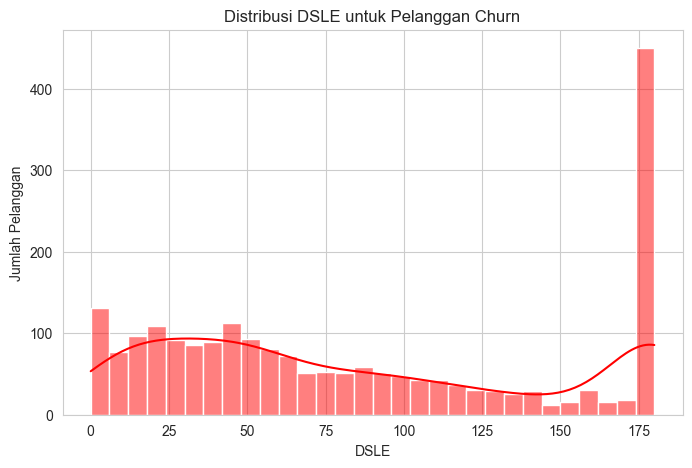

In [26]:
churn_data = data[data["label_dsle"] == 1]


plt.figure(figsize=(8, 5))
sns.histplot(churn_data["dsle"], bins=30, kde=True, color="red")
plt.xlabel("DSLE")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi DSLE untuk Pelanggan Churn")
plt.show()

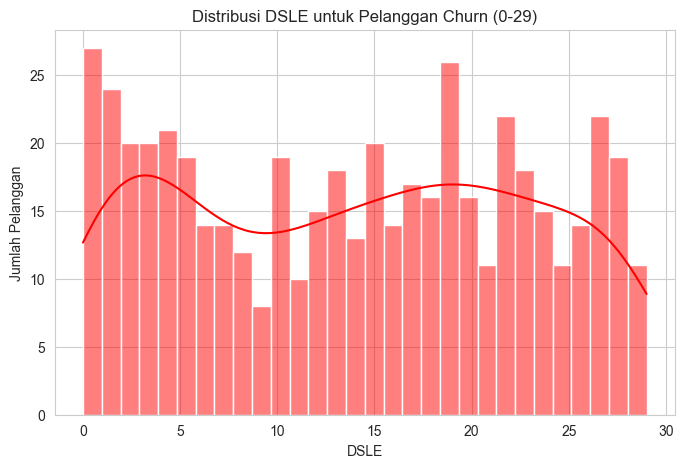

In [27]:
churn_data = data[(data["label_dsle"] == 1) & (data["dsle"] >= 0) & (data["dsle"] <= 29)]

plt.figure(figsize=(8, 5))
sns.histplot(churn_data["dsle"], bins=30, kde=True, color="red")
plt.xlabel("DSLE")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi DSLE untuk Pelanggan Churn (0-29)")
plt.show()

In [28]:
churn_filtered_data = data[(data["label_dsle"] == 1) & (data["dsle"] >= 0) & (data["dsle"] <= 29)]

def categorize_dsle(dsle):
    if dsle == 0:
        return "DSLE 0"
    elif 1 == dsle:
        return "DSLE 1"
    elif 2 <= dsle <= 3:
        return "DSLE 2-3"
    elif 4 <= dsle <= 5:
        return "DSLE 4-5"
    else:
        return "DSLE 6-29"

churn_filtered_data["dsle_category"] = churn_filtered_data["dsle"].apply(categorize_dsle)

numerical_cols = churn_filtered_data.select_dtypes(include=["number"]).columns

avg_by_dsle = churn_filtered_data.groupby("dsle_category")[numerical_cols].mean().T

ordered_columns = ["DSLE 0", "DSLE 1", "DSLE 2-3", "DSLE 4-5", "DSLE 6-29"]
avg_by_dsle = avg_by_dsle[ordered_columns]
avg_by_dsle.style.format("{:,.2f}")


C:\Users\User\AppData\Local\Temp\ipykernel_11060\2287129448.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_filtered_data["dsle_category"] = churn_filtered_data["dsle"].apply(categorize_dsle)


dsle_category,DSLE 0,DSLE 1,DSLE 2-3,DSLE 4-5,DSLE 6-29
subs_no,"632,465,545.44","718,246,804.67","697,810,064.90","483,396,526.62","518,717,623.89"
brand,1.00,1.00,1.00,1.00,1.00
tenure,"1,193.59",797.62,"1,387.03","1,242.72",902.66
dsle,0.00,1.00,2.50,4.47,17.96
dwe_m0,13.48,18.54,13.97,13.60,7.26
dwg_m0,13.19,18.12,13.03,13.47,6.93
dwe_m0_grp,9.15,10.42,8.30,8.05,4.33
dwg_m0_grp,8.56,10.42,8.15,8.00,4.19
non_data,0.00,0.00,0.00,0.00,0.00
rembal,"23,192.56","39,999.96","13,540.25","4,158.27","10,768.86"


In [29]:
dsle_counts = churn_filtered_data["dsle_category"].value_counts().reindex(ordered_columns, fill_value=0)
dsle_counts

dsle_category
DSLE 0        27
DSLE 1        24
DSLE 2-3      40
DSLE 4-5      40
DSLE 6-29    375
Name: count, dtype: int64

In [30]:
total_churn = len(churn_filtered_data)
dsle_proportion = (dsle_counts / total_churn) * 100
print(dsle_proportion.to_frame().rename(columns={0: "Persentase (%)"}))


                   count
dsle_category           
DSLE 0          5.335968
DSLE 1          4.743083
DSLE 2-3        7.905138
DSLE 4-5        7.905138
DSLE 6-29      74.110672


In [31]:
total_churn = len(data)
dsle_proportion = (dsle_counts / total_churn) * 100
print(dsle_proportion.to_frame().rename(columns={0: "Persentase (%)"}))


               count
dsle_category       
DSLE 0          0.27
DSLE 1          0.24
DSLE 2-3        0.40
DSLE 4-5        0.40
DSLE 6-29       3.75


In [32]:
churn_filtered_data["dsle_category"] = churn_filtered_data["dsle"].apply(categorize_dsle)
categorical_cols = churn_filtered_data.select_dtypes(include=["object"]).columns

mode_by_dsle = churn_filtered_data.groupby("dsle_category")[categorical_cols].agg(lambda x: x.mode()[0]).T

ordered_columns = ["DSLE 0", "DSLE 1", "DSLE 2-3", "DSLE 4-5", "DSLE 6-29"]
mode_by_dsle = mode_by_dsle[ordered_columns]
mode_by_dsle

C:\Users\User\AppData\Local\Temp\ipykernel_11060\1839087384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_filtered_data["dsle_category"] = churn_filtered_data["dsle"].apply(categorize_dsle)


dsle_category,DSLE 0,DSLE 1,DSLE 2-3,DSLE 4-5,DSLE 6-29
status,ACTIVE,ACTIVE,ACTIVE,ACTIVE,GRACE
dsle_grp,0,<5,<5,<5,>5
svc_user,VD,D,D,D,D
tag,test,test,test,test,test
tenure_grp,5.24+,5.24+,5.24+,5.24+,5.24+
dsle_category,DSLE 0,DSLE 1,DSLE 2-3,DSLE 4-5,DSLE 6-29


In [33]:
data_sample['ra_total_m1_bin'] = pd.cut(
    data_sample['ra_total_m1'],
    bins=[-np.inf, 200000, 500000, np.inf],
    labels=["<200000", "200000-500000", ">500000"]
)

crosstab_custom = pd.crosstab(data_sample['ra_total_m1_bin'], data_sample['label_dsle'])

crosstab_custom.rename(columns={0: 'no', 1: 'churn'}, inplace=True)

crosstab_custom['total'] = crosstab_custom['no'] + crosstab_custom['churn']
crosstab_custom['percentage'] = (crosstab_custom['churn'] / crosstab_custom['total']) * 100

print(crosstab_custom)

label_dsle         no  churn  total  percentage
ra_total_m1_bin                                
<200000          7603    605   8208    7.370858
200000-500000     148      1    149    0.671141
>500000             4      0      4    0.000000


In [34]:
data_sample['lastw1_usg_bin'] = pd.cut(
    data_sample['lastw1_usg'],
    bins=[-np.inf, 5000, 1000000, np.inf],
    labels=["<5000", "5000-1000000", ">1000000"]
)

crosstab_custom = pd.crosstab(data_sample['lastw1_usg_bin'], data_sample['label_dsle'])

crosstab_custom.rename(columns={0: 'no', 1: 'churn'}, inplace=True)

crosstab_custom['total'] = crosstab_custom['no'] + crosstab_custom['churn']
crosstab_custom['percentage'] = (crosstab_custom['churn'] / crosstab_custom['total']) * 100

print(crosstab_custom)

label_dsle        no  churn  total  percentage
lastw1_usg_bin                                
<5000           1079    135   1214   11.120264
5000-1000000    1807     50   1857    2.692515
>1000000        4444     19   4463    0.425723


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


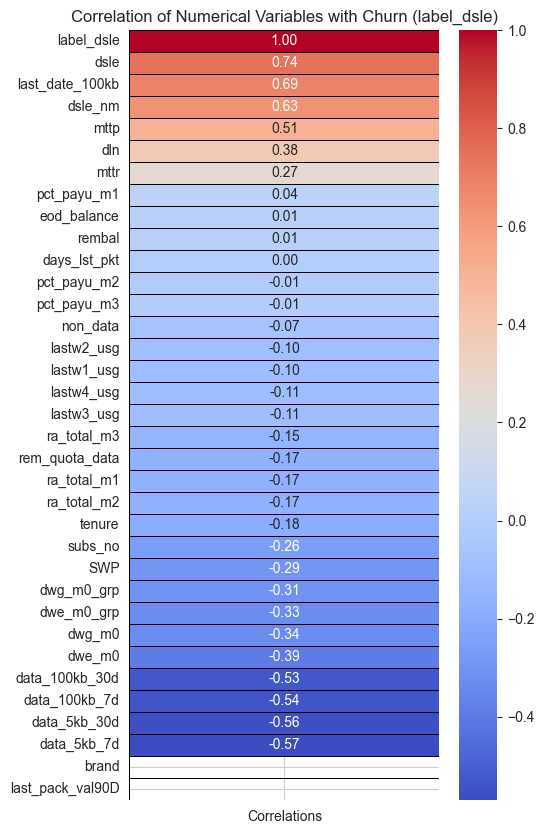

In [35]:
numerical_cols = data_sample.select_dtypes(include=["number"])

corr = numerical_cols.corrwith(numerical_cols['label_dsle']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

plt.figure(figsize=(5, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.4, linecolor='black', fmt=".2f")
plt.title("Correlation of Numerical Variables with Churn (label_dsle)")
plt.show()


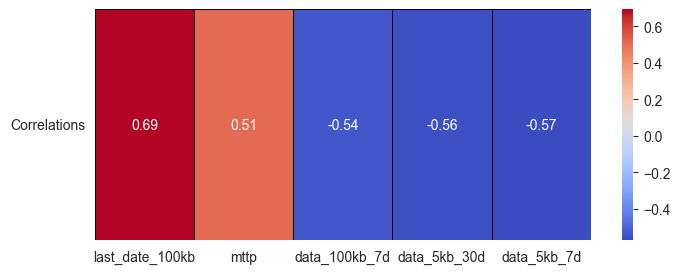

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

excluded_cols = ["is_churn", "label_dsle", "dsle", "dsle_nm","brand","last_pack_val90D"]
numerical_cols = data_sample.select_dtypes(include=["number"]).drop(columns=excluded_cols, errors="ignore")

corr = numerical_cols.corrwith(data_sample['label_dsle']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

top_positive = corr.head(2)
top_negative = corr.tail(3)

top_corr = pd.concat([top_positive, top_negative])

plt.figure(figsize=(8, 3))  
sns.heatmap(top_corr.T, annot=True, cmap="coolwarm", linewidths=0.4, linecolor='black', fmt=".2f")
plt.title("")
plt.yticks(rotation=0)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_11060\2735891827.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data["churn_reason"] = churn_data.apply(categorize_churn, axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_11060\2735891827.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="churn_reason", data=churn_data, palette="coolwarm", order=["Network Issue", "Pricing Issue", "Other"])


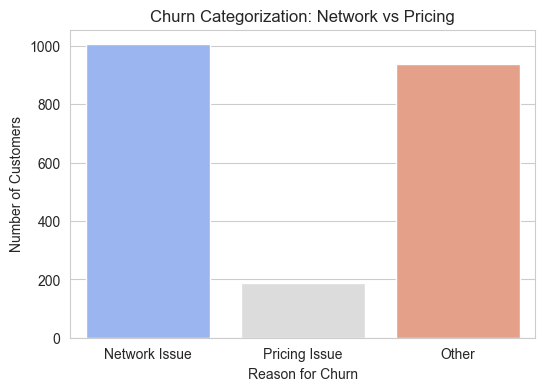

In [37]:
churn_data = data[data["label_dsle"] == 1]

network_threshold = churn_data["dsle"].median()  
price_threshold = churn_data["eod_balance"].median() 
def categorize_churn(row):
    if row["dsle"] >= network_threshold and row["mttr"] >= churn_data["mttr"].median():
        return "Network Issue"
    elif row["eod_balance"] <= price_threshold and row["pct_payu_m1"] <= churn_data["pct_payu_m1"].median():
        return "Pricing Issue"
    else:
        return "Other"

churn_data["churn_reason"] = churn_data.apply(categorize_churn, axis=1)

plt.figure(figsize=(6, 4))
sns.countplot(x="churn_reason", data=churn_data, palette="coolwarm", order=["Network Issue", "Pricing Issue", "Other"])
plt.xlabel("Reason for Churn")
plt.ylabel("Number of Customers")
plt.title("Churn Categorization: Network vs Pricing")
plt.show()


### Preprocessing

In [38]:
from sklearn.preprocessing import LabelEncoder

file_path = "Churn Dataset N_10000.xlsx"
sheet_name = "sample"
data_sample = pd.read_excel(file_path, sheet_name=sheet_name)

data_sample["date_id"] = data_sample["date_id"].astype("int64")

data_sample.fillna(0, inplace=True)

categorical_columns = data_sample.select_dtypes(include=["object"]).columns
label_encoders = {}

for col in categorical_columns:
    data_sample[col] = data_sample[col].astype(str)  
    le = LabelEncoder()
    data_sample[col] = le.fit_transform(data_sample[col])
    label_encoders[col] = le

print("Jumlah missing values setelah penggantian:")
print(data_sample.isnull().sum())


Jumlah missing values setelah penggantian:
date_id             0
subs_no             0
brand               0
status              0
tenure              0
dsle                0
dwe_m0              0
dwg_m0              0
dsle_grp            0
dwe_m0_grp          0
dwg_m0_grp          0
non_data            0
rembal              0
svc_user            0
rem_quota_data      0
dsle_nm             0
label_dsle          0
data_100kb_30d      0
data_100kb_7d       0
data_5kb_7d         0
data_5kb_30d        0
lastw1_usg          0
lastw2_usg          0
lastw3_usg          0
lastw4_usg          0
last_date_100kb     0
ra_total_m1         0
ra_total_m2         0
ra_total_m3         0
pct_payu_m1         0
pct_payu_m2         0
pct_payu_m3         0
eod_balance         0
mttp                0
mttr                0
dln                 0
last_pack_val90D    0
SWP                 0
days_lst_pkt        0
tag                 0
tenure_grp          0
dtype: int64


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN

X = data_sample.drop(columns=['label_dsle', 'dsle_nm', 'date_id', 'subs_no'])
y = data_sample['label_dsle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#1
model = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=33)
model.fit(X_train, y_train)
#2
X_dsle_train = X_train[X_train['dsle'] <= 1]
y_dsle_train = y_train.loc[X_dsle_train.index]

adasyn = ADASYN(random_state=42)
X_dsle_resampled, y_dsle_resampled = adasyn.fit_resample(X_dsle_train, y_dsle_train)

rf_dsle_model = RandomForestClassifier(max_depth=40,n_estimators=100, random_state=33, class_weight={0: 1, 1: 20})
rf_dsle_model.fit(X_dsle_resampled, y_dsle_resampled)
#3
X_dsle_2_5_train = X_train[(X_train['dsle'] > 1) & (X_train['dsle'] <= 5)]
y_dsle_2_5_train = y_train.loc[X_dsle_2_5_train.index]

adasyn = ADASYN(random_state=42)
X_dsle_2_5_resampled, y_dsle_2_5_resampled = adasyn.fit_resample(X_dsle_2_5_train, y_dsle_2_5_train)

rf_dsle_2_5_model = RandomForestClassifier(max_depth=9, random_state=33, class_weight={0: 1, 1: 10})
rf_dsle_2_5_model.fit(X_dsle_2_5_resampled, y_dsle_2_5_resampled)

def combined_model_predict_v2(X_test):
    predictions = []
    for _, row in X_test.iterrows():
        if row['dsle'] <= 1:
            pred = rf_dsle_model.predict(row.values.reshape(1, -1))[0]
        elif 1 < row['dsle'] <= 5:
            pred = rf_dsle_2_5_model.predict(row.values.reshape(1, -1))[0]
        else:
            pred = model.predict(row.values.reshape(1, -1))[0]
        predictions.append(pred)
    return predictions

y_combined_pred_v2 = combined_model_predict_v2(X_test)

print("\nClassification Report for Combined Model:")
print(classification_report(y_test, y_combined_pred_v2, zero_division=0))



Classification Report for Combined Model:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1548
           1       0.83      0.89      0.86       452

    accuracy                           0.93      2000
   macro avg       0.90      0.92      0.91      2000
weighted avg       0.93      0.93      0.93      2000



In [40]:
df_test = pd.DataFrame({
    'dsle': X_test['dsle'].values,
    'y_test': y_test.values,
    'y_pred': y_combined_pred_v2
})

bins = [-float('inf'), 1, 5, 29, float('inf')]
labels = ['<=1', '2-5', '6-29', '>29']
df_test['dsle_grp'] = pd.cut(df_test['dsle'], bins=bins, labels=labels, right=False)

for group in labels:
    df_group = df_test[df_test['dsle_grp'] == group]
    if not df_group.empty:
        print(f"Classification Report for dsle group: {group}")
        report = classification_report(df_group['y_test'], df_group['y_pred'], zero_division=0)
        print(report)
    else:
        print(f"No data for dsle group: {group}")


Classification Report for dsle group: <=1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1261
           1       0.25      0.17      0.20         6

    accuracy                           0.99      1267
   macro avg       0.62      0.58      0.60      1267
weighted avg       0.99      0.99      0.99      1267

Classification Report for dsle group: 2-5
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       132
           1       0.21      0.46      0.29        13

    accuracy                           0.80       145
   macro avg       0.58      0.65      0.59       145
weighted avg       0.88      0.80      0.83       145

Classification Report for dsle group: 6-29
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       120
           1       0.59      0.57      0.58        72

    accuracy                           0.69       192
 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_dsle_train = X_train[X_train['dsle'] <= 1]
y_dsle_train = y_train.loc[X_dsle_train.index]

X_dsle_2_5_train = X_train[(X_train['dsle'] > 1) & (X_train['dsle'] <= 5)]
y_dsle_2_5_train = y_train.loc[X_dsle_2_5_train.index]

X_dsle = X[X['dsle'] <= 1]
X_dsle_2_5 = X[(X['dsle'] > 1) & (X['dsle'] <= 5)]

feature_importance_model = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance_dsle = pd.DataFrame({
    'Feature': X_dsle.columns,
    'Importance': rf_dsle_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance_dsle_2_5 = pd.DataFrame({
    'Feature': X_dsle_2_5.columns,
    'Importance': rf_dsle_2_5_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance - Model > 5")
print(feature_importance_model)

print("\nFeature Importance - Model dsle ≤ 1")
print(feature_importance_dsle)

print("\nFeature Importance - Model 1 < dsle ≤ 5")
print(feature_importance_dsle_2_5)




Feature Importance - Model > 5
             Feature  Importance
3               dsle    0.167634
7         dwe_m0_grp    0.115934
31               dln    0.090210
4             dwe_m0    0.061920
8         dwg_m0_grp    0.060475
5             dwg_m0    0.054658
15       data_5kb_7d    0.053845
18        lastw2_usg    0.047641
13    data_100kb_30d    0.030673
2             tenure    0.025618
16      data_5kb_30d    0.021091
17        lastw1_usg    0.020414
10            rembal    0.019868
28       eod_balance    0.018685
29              mttp    0.018344
21   last_date_100kb    0.017730
30              mttr    0.017668
34      days_lst_pkt    0.015784
23       ra_total_m2    0.015508
6           dsle_grp    0.014421
24       ra_total_m3    0.013982
22       ra_total_m1    0.012443
14     data_100kb_7d    0.011770
19        lastw3_usg    0.011027
1             status    0.010143
11          svc_user    0.009380
20        lastw4_usg    0.008207
25       pct_payu_m1    0.007604
27       pc

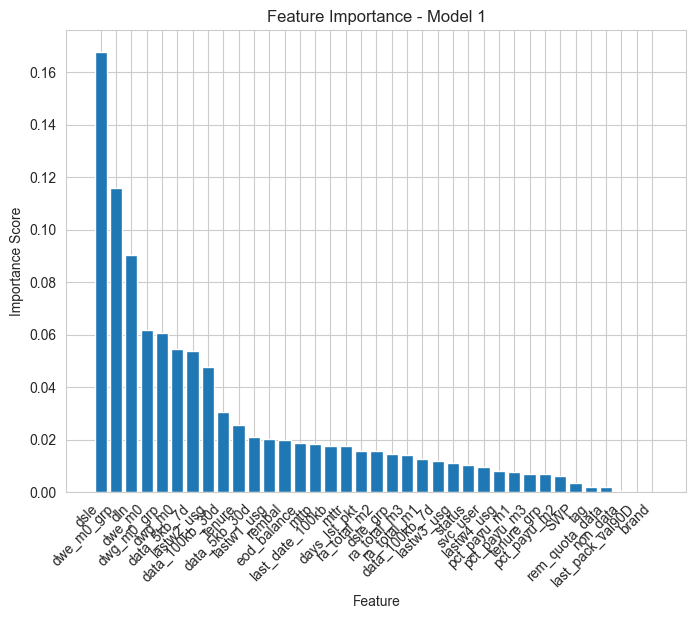

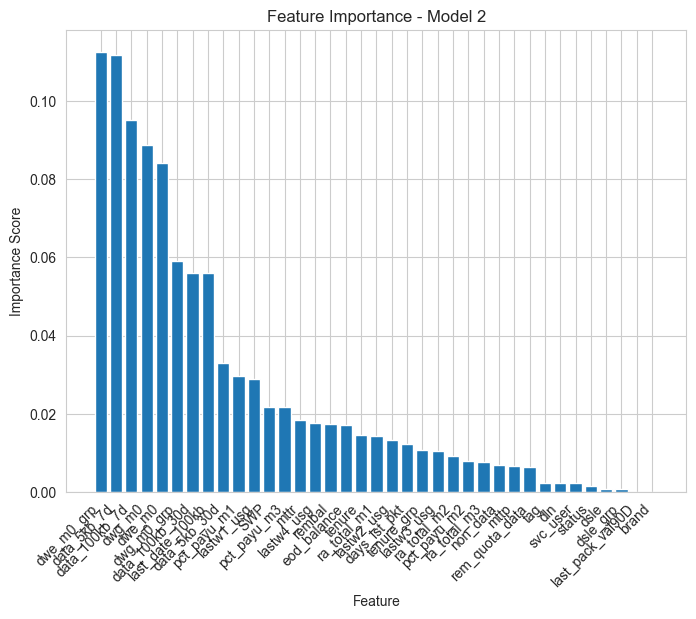

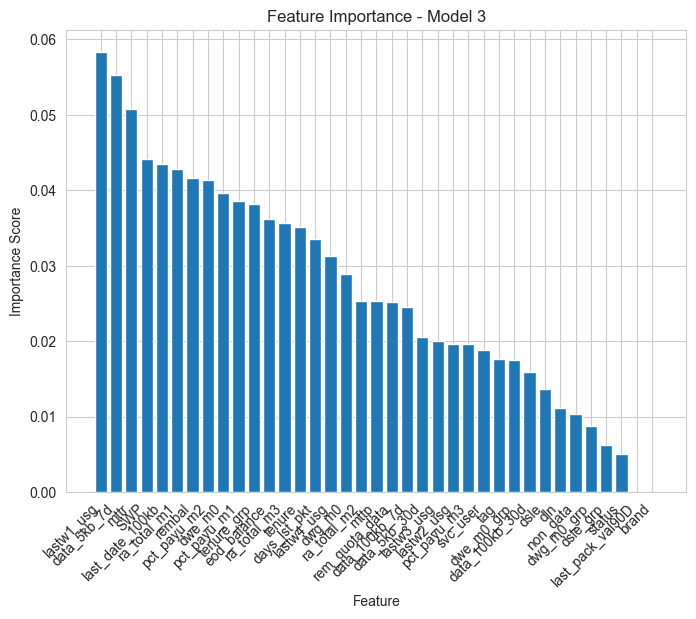

In [42]:
def plot_feature_importance(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8, 6))
    plt.title(f"Feature Importance - {title}")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45, ha='right')
    plt.xlabel("Feature")
    plt.ylabel("Importance Score")
    plt.show()

plot_feature_importance(model, X_train.columns, "Model 1")

plot_feature_importance(rf_dsle_model, X_dsle.columns, "Model 2")

plot_feature_importance(rf_dsle_2_5_model, X_dsle_2_5.columns, "Model 3")



Classification Report for dsle <= 29:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1514
           1       0.47      0.53      0.50        92

    accuracy                           0.94      1606
   macro avg       0.72      0.75      0.73      1606
weighted avg       0.94      0.94      0.94      1606



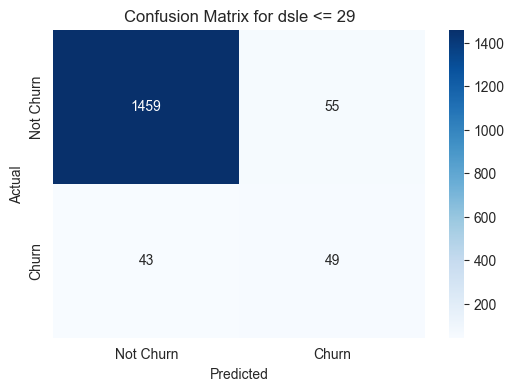

In [43]:
X_test_dsle_0_29 = X_test[X_test['dsle'] <= 29]
y_test_dsle_0_29 = y_test[X_test['dsle'] <= 29]

y_pred_dsle_0_29 = combined_model_predict_v2(X_test_dsle_0_29)


print("\nClassification Report for dsle <= 29:")
print(classification_report(y_test_dsle_0_29, y_pred_dsle_0_29, zero_division=0))

cm = confusion_matrix(y_test_dsle_0_29, y_pred_dsle_0_29)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix for dsle <= 29')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [44]:
df_test = pd.DataFrame({
    'dsle': X_test_dsle_0_29['dsle'].values,
    'y_test': y_test_dsle_0_29.values,
    'y_pred': y_pred_dsle_0_29
})

def categorize_dsle(dsle):
    if dsle <= 1:
        return '<=1'
    elif 1 < dsle <= 5:
        return '2-5'
    elif 5 < dsle <= 29:
        return '6-29'
    else:
        return '>29'

df_test['dsle_grp'] = df_test['dsle'].apply(categorize_dsle)

labels = ['<=1', '2-5', '6-29', '>29']
for group in labels:
    df_group = df_test[df_test['dsle_grp'] == group]
    if not df_group.empty:
        print(f"Classification Report for dsle group: {group}")
        report = classification_report(df_group['y_test'], df_group['y_pred'], zero_division=0)
        print(report)

    else:
        print(f"No data for dsle group: {group}")


Classification Report for dsle group: <=1
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1316
           1       0.20      0.12      0.15         8

    accuracy                           0.99      1324
   macro avg       0.60      0.56      0.57      1324
weighted avg       0.99      0.99      0.99      1324

Classification Report for dsle group: 2-5
              precision    recall  f1-score   support

           0       0.91      0.69      0.79        88
           1       0.23      0.57      0.33        14

    accuracy                           0.68       102
   macro avg       0.57      0.63      0.56       102
weighted avg       0.82      0.68      0.72       102

Classification Report for dsle group: 6-29
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       110
           1       0.62      0.57      0.60        70

    accuracy                           0.70       180
 